Repo set up, initial push had errors, testing to ensure ready to start project and making commits

test

# Investigation of the Wisconsin Breast Cancer dataset.

In [1]:
# Step 1: Import dataset and required libraries:

# NumPy for numerical operations
import numpy as np

# Pandas for data analysis
import pandas as pd

# seaborn
import seaborn as sns

# random
import random

from scipy.stats import norm

# Statistics for descriptive statistics
import statistics

# Matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# sklearn
import sklearn.neighbors as nei

from sklearn.neighbors import KNeighborsClassifier

# importing the dataset:

# Creating file path variable:
file_path = "..\PfDA_2\wbc.data"

# above .data file is comma delimited 
wbc_data = pd.read_csv(file_path, delimiter=",")

# Define columns in wbc_data
wbc_data.columns = ["Sample ID Number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitosis", "Class"]

Dataset (original Attiributes:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [2]:
# # read the top/head of the dataset

wbc_data.head()

,Sample ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
# read the foot/tail of the dataset

wbc_data.tail()

,Sample ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


In [4]:
# Statistical analysis of the dataset using describe()

wbc_data.describe()

,Sample ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitosis,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
# Must check for any null values

wbc_data.isnull().sum()

Sample ID Number               0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitosis                        0
Class                          0
dtype: int64

In [6]:
# Check the datatypes:

print(wbc_data.dtypes)

Sample ID Number                int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitosis                         int64
Class                           int64
dtype: object


In [11]:
# Check shape of dataset

print (wbc_data.shape)

(698, 11)


In [13]:
# Sample ID number is not relevant to this analysis therefore it was identified to be removed.

dummy_field = ["Sample ID Number"]

wbc_data = wbc_data.drop(dummy_field, axis=1)

In [14]:
# Checking dataset to ensure "Sample ID Number" has been dropped

wbc_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


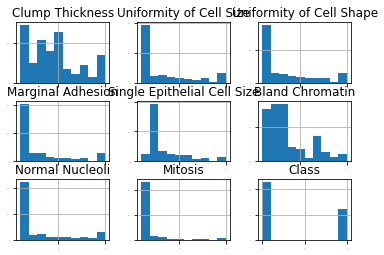

In [17]:
# Plotting some histograms focusing on Mitosis.

wbc_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

# plt.show()

data_df = list(wbc_data.columns[0:10])

X = wbc_data.loc[:, data_df]
y = wbc_data["Mitosis"]

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [19]:
import pandas as pd
from pandas import set_option
from sklearn import svm
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [12]:
desired_width = 480
pd.set_option('display.width', desired_width)

In [21]:
svm_model = SVC()
# c_values = [1, 10, 100, 1000]
# kernel_values = ['linear']
# param_grid = dict(C=c_values, kernel=kernel_values)

param_grid = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print()
print("Grid scores on training set:")
print()
means = grid_result.cv_results_["Clump Thickness"]
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.